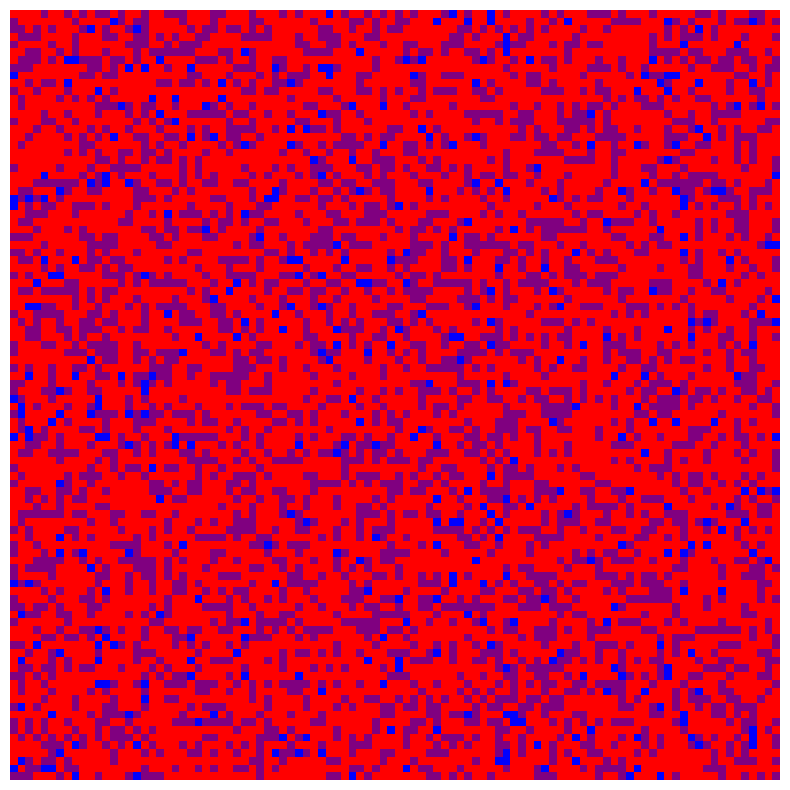

Value_High    0.881472
Value_Low     0.092496
dtype: float64


In [2]:
from main import LearningModel

#Here you can run a model once with different learning models and food environments. 
#You can either use 'TD', 'RW', or 'RWE' at learning_model.
#You can pick 'random', 'gradient_l', 'gradient_h', 'weekday' as food environments.
#You can also fill in an integer (e.g., 1) after seed to make the simulation reproducible.
#Epsilon represents the probability that an agent chooses the other option regardless of preference. For example, when dieting.
#Theta represents the H to L ratio in the random food environment.

m = LearningModel(N=100, width=100, height=100, learning_model='RWE', distribute_patches = 'random', seed = None, epsilon = 0.05, theta = 4)

for i in range(100):
    m.step()

df = m.datacollector.get_agent_vars_dataframe()
df1 = df.reset_index()

m.visualize() #In case you want to check distribution of food on map.

data = df.reset_index() 
filtered_data = data[data["Step"] == 99]  # Filter rows where Step equals 99
average_values = filtered_data[['Value_High', 'Value_Low']].mean()  # Calculate mean for the selected columns

print(average_values)

Text(0, 0.5, 'V')

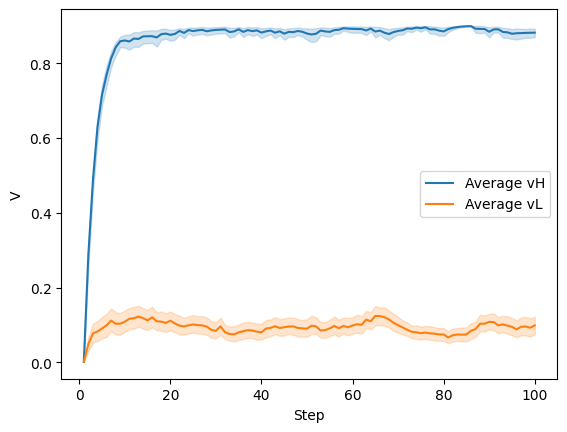

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

#Plot the results of the single run.

sns.lineplot(df1, x = "Step", y = "Value_High", label = "Average vH")
sns.lineplot(df1, x = "Step", y = "Value_Low", label = "Average vL")
plt.ylabel('V')

#### Batch run

In [6]:
from main import LearningModel
from tqdm import tqdm 
import pandas as pd

#With the batch_run function you can run the model in 6 different configurations as often as you like. This will return a dataframe called "data".
#The dataframe contains time-series data for all agents for every single run in the 6 different configurations.

iterations = 10
learning_models = ["TD", "RWE"]
distribute_patches = ["random", "gradient_h", "gradient_l"]

def batch_run():
    all_data = []
    
    total_runs = len(learning_models) * len(distribute_patches) * iterations
    progress_bar = tqdm(total=total_runs, desc="Batch Running")

    for learning_model in learning_models:
        for distribute_patch in distribute_patches:
            batch_run_data = []
            for i in range(iterations):
                model = LearningModel(N=100, width=100, height=100, learning_model=learning_model, distribute_patches=distribute_patch)
                
                # Run the model for a fixed number of steps
                for _ in range(100):
                    model.step()
                
                # Get model data
                m_data = model.datacollector.get_agent_vars_dataframe()
                m_data['Run'] = i
                m_data['Learning_Model'] = learning_model
                m_data['Distribute_Patches'] = distribute_patch
                batch_run_data.append(m_data)

                progress_bar.update(1)
            
            # Concatenate the data for this configuration
            batch_run_data = pd.concat(batch_run_data)
            all_data.append(batch_run_data)
    
    # Concatenate all configurations
    all_data = pd.concat(all_data)
    
    return all_data

# Run the custom batch run function
data = batch_run()

Batch Running: 100%|██████████| 60/60 [00:08<00:00,  7.34it/s]


In [7]:
data = data.reset_index()

#### Initial model comparison in random environment

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_random_env_rw_td(data, legend_labels, custom_palette):
    # Filter data for the 'random' environment and 'RW' and 'TD' learning models
    df_filtered = data[(data['Distribute_Patches'] == 'random') & 
                       (data['Learning_Model'].isin(['RW', 'TD']))]

    # Melt the DataFrame to long format for easier plotting with seaborn
    df_melted = df_filtered.melt(id_vars=['Step', 'Learning_Model'], 
                                 value_vars=['Value_High', 'Value_Low'], 
                                 var_name='Food', value_name='Value')

    plt.rcParams.update({
        'font.size': 18,          # general font size
        'axes.titlesize': 20,     # title font size
        'axes.labelsize': 18,     # x and y label font size
        'xtick.labelsize': 18,    # x tick label font size
        'ytick.labelsize': 18,    # y tick label font size
        'legend.fontsize': 18     # legend font size
    })

    # Plot the data using seaborn
    plt.figure(figsize=(12, 8))
    
    sns.lineplot(data=df_melted, x='Step', y='Value', hue='Food', 
                 style='Learning_Model', estimator='mean', errorbar=('ci', 80), palette= custom_palette)
    
    plt.xlabel('Steps')
    plt.ylabel('Average Anticipated Reward')

    # Customizing the legend
    handles, labels = plt.gca().get_legend_handles_labels()
    new_labels = [legend_labels.get(label, label) for label in labels]
    plt.legend(handles, new_labels, title='')

    plt.show()

# Example of how to use the function with custom legend labels
legend_labels = {
    'Value_High': 'H',
    'Value_Low': 'L',
    'Learning_Model': 'Learning Model',
    'Food': 'Food Object'
}

custom_palette = {
    'Value_High': '#d62728',
    'Value_Low': '#1f77b4'

}

# Assuming 'data' is the DataFrame with your results
plot_random_env_rw_td(data, legend_labels, custom_palette)


#### Different environments and learning models

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams.update({
        'font.size': 18,          # general font size
        'axes.titlesize': 20,     # title font size
        'axes.labelsize': 18,     # x and y label font size
        'xtick.labelsize': 18,    # x tick label font size
        'ytick.labelsize': 18,    # y tick label font size
        'legend.fontsize': 18     # legend font size
    })

def plot_results(data, distribute_patch, legend_labels, custom_palette):
    # Filter data for the specific distribute_patch
    df_filtered = data[data['Distribute_Patches'] == distribute_patch]
    
    df_melted = df_filtered.melt(id_vars=['Step', 'Learning_Model'], 
                                 value_vars=['Value_High', 'Value_Low'], 
                                 var_name='Food', value_name='Value')

    # Plot the data using seaborn
    plt.figure(figsize=(12, 8))
    sns.lineplot(data=df_melted, x='Step', y='Value', hue = 'Food', style='Learning_Model', palette = custom_palette, estimator='mean', errorbar=('ci', 80), legend = False)
    plt.xlabel('Steps')
    plt.ylabel('Anticipated Reward Value')
    handles, labels = plt.gca().get_legend_handles_labels()
    new_labels = [legend_labels.get(label, label) for label in labels]
    #plt.legend(handles, new_labels, title='', loc = "lower center", bbox_to_anchor = (0.5, -0.35) , ncol = 2, frameon = False)

    plt.show()

# Example of how to use the function with custom legend labels
legend_labels = {
    'Value_High': 'H',
    'Value_Low': 'L',
    'Learning_Model': 'Learning Model'
}

custom_palette = {
    'Value_High': '#d62728',
    'Value_Low': '#1f77b4'

}

# Plot results for each distribute_patch
for distribute_patch in distribute_patches:
    plot_results(data, distribute_patch, legend_labels, custom_palette)

In [12]:
from main import LearningModel
import pandas as pd
from tqdm import tqdm

# Define the parameters to vary
learning_model = "RWE"
distribute_patch = "random"
thetas = [0.25, 0.5, 1.0, 2.0, 4.0]  #H to L ratio
epsilons = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]  #"dieting" 

def batch_run_2():
    results = []
    
    for theta in thetas:
        for epsilon in epsilons:
            for i in tqdm(range(10), desc=f"Running {learning_model} with theta={theta}, epsilon={epsilon}"):
                model = LearningModel(N=100, width=100, height=100, learning_model=learning_model, distribute_patches=distribute_patch, theta=theta, epsilon=epsilon, value_high=0.89, value_low=0.10)
                
                for step in range(1000):
                    model.step()
                
                # Collect data from agents
                for agent in model.schedule.agents:
                    results.append({
                        "Run": i,
                        "Theta": theta,
                        "Epsilon": epsilon,
                        "Value_High": agent.value_high,
                        "Value_Low": agent.value_low,
                    })
    
    return results

df = pd.DataFrame(batch_run_2())

Running RWE with theta=4.0, epsilon=1.0: 100%|██████████| 10/10 [00:07<00:00,  1.42it/s]


In [17]:
from main import LearningModel
import pandas as pd
from tqdm import tqdm

# Define the parameters to vary
learning_model = "RWE"
distribute_patch = "random"
thetas = [0.25, 0.5, 1.0, 2.0, 4.0]  #H to L ratio
epsilons = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]  #"dieting" 

def batch_run_2():
    results = []
    
    for theta in thetas:
        for epsilon in epsilons:
            for i in tqdm(range(10), desc=f"Running {learning_model} with theta={theta}, epsilon={epsilon}"):
                model = LearningModel(N=100, width=100, height=100, learning_model=learning_model, distribute_patches=distribute_patch, theta=theta, epsilon=epsilon, value_high=0.89, value_low=0.10)
                
                for step in range(100):
                    model.step()
                
                # Collect data from agents
                for agent in model.schedule.agents:
                    results.append({
                        "Run": i,
                        "Theta": theta,
                        "Epsilon": epsilon,
                        "Value_High": agent.value_high,
                        "Value_Low": agent.value_low,
                    })
    
    return results

df = pd.DataFrame(batch_run_2())

Running RWE with theta=0.25, epsilon=0.1:   0%|          | 0/10 [00:00<?, ?it/s]

Running RWE with theta=4.0, epsilon=1.0: 100%|██████████| 10/10 [00:01<00:00,  7.11it/s]


In [21]:
df_avg = df.groupby(["Run", "Epsilon", "Theta"]).mean().reset_index()

In [25]:
# Filter for Theta == 4.0 and Epsilon == 0.10
filtered_data_1 = df_avg[(df_avg["Theta"] == 4.0) & (df_avg["Epsilon"] == 1.0)]

# Filter for Theta == 0.25 and Epsilon == 1.0
filtered_data_2 = df_avg[(df_avg["Theta"] == 0.25) & (df_avg["Epsilon"] == 0.1)]

# Calculate means for both conditions
mean_1 = filtered_data_1[['Value_High', 'Value_Low']].mean()
mean_2 = filtered_data_2[['Value_High', 'Value_Low']].mean()

print(mean_1, mean_2)

Value_High    0.661412
Value_Low     0.476211
dtype: float64 Value_High    0.511402
Value_Low     0.497106
dtype: float64


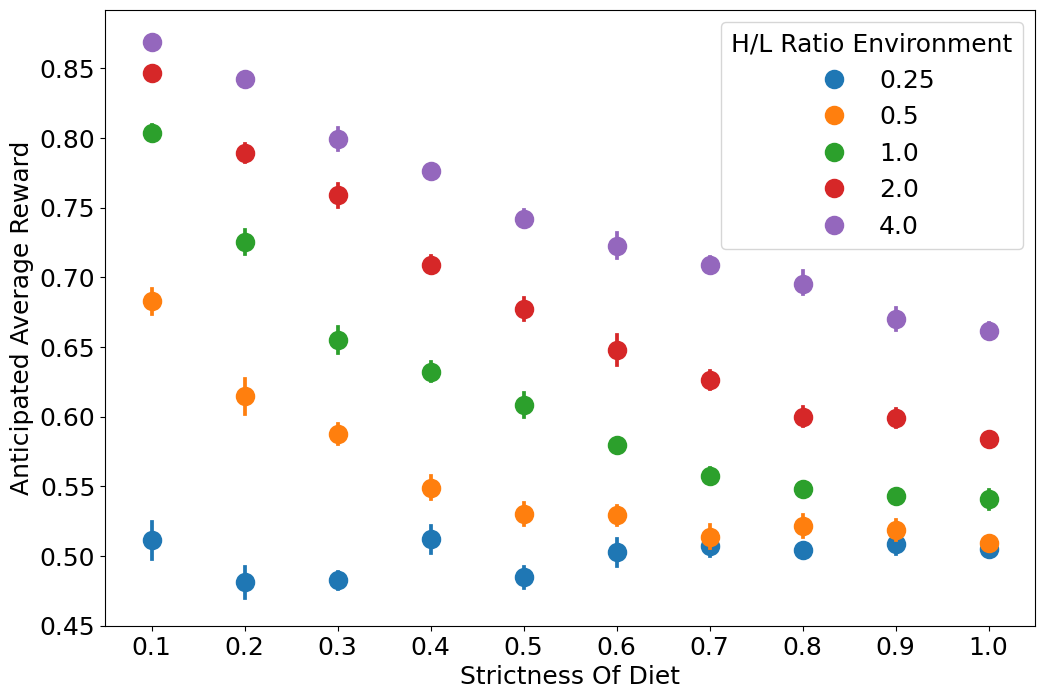

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_results():
    plt.figure(figsize=(12, 8))
    plt.rcParams.update({
        'font.size': 18,          # general font size
        'axes.titlesize': 20,     # title font size
        'axes.labelsize': 18,     # x and y label font size
        'xtick.labelsize': 18,    # x tick label font size
        'ytick.labelsize': 18,    # y tick label font size
        'legend.fontsize': 18     # legend font size
    })
    # Plot Value_High
    sns.pointplot(data=df_avg, x='Epsilon', y='Value_High', hue='Theta', errorbar=('ci', 80), markersize = 12, linestyle = 'none', palette='tab10')
    plt.xlabel('Strictness Of Diet')
    plt.ylabel('Anticipated Average Reward')
    plt.legend(title='H/L Ratio Environment')
    plt.show()

# Plot results
plot_results()

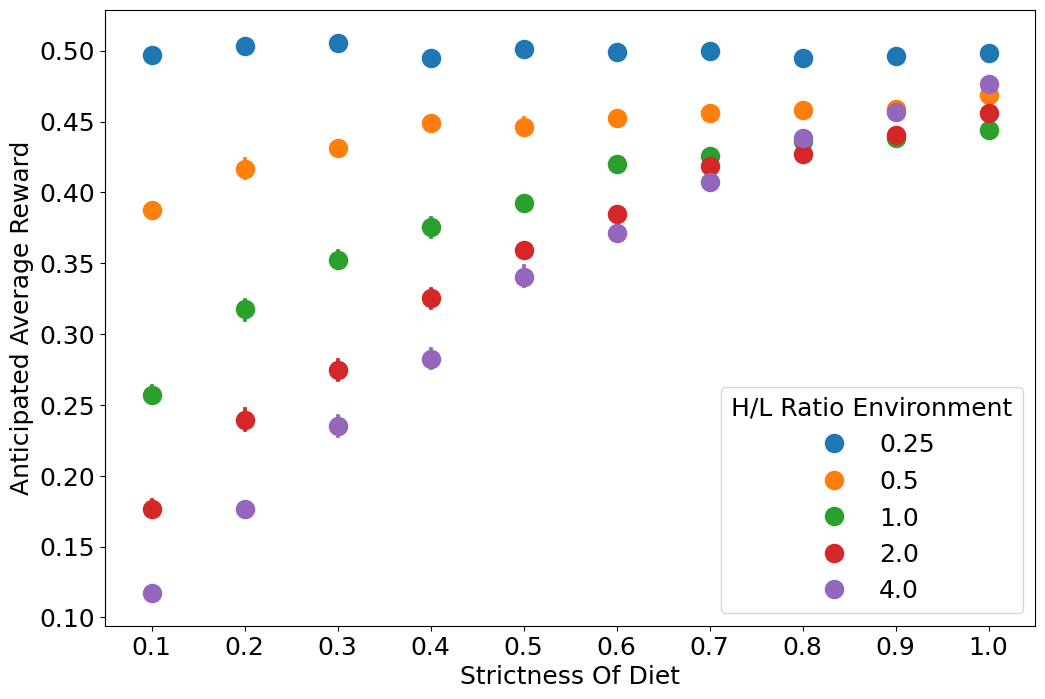

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_results():
    plt.figure(figsize=(12, 8))
    sns.pointplot(data=df_avg, x='Epsilon', y='Value_Low', hue='Theta', errorbar=('ci', 80), markersize = 12, linestyle = 'none', palette='tab10')
    plt.xlabel('Strictness Of Diet')
    plt.ylabel('Anticipated Average Reward')
    plt.legend(title='H/L Ratio Environment')
    plt.rcParams.update({
        'font.size': 18,          # general font size
        'axes.titlesize': 20,     # title font size
        'axes.labelsize': 18,     # x and y label font size
        'xtick.labelsize': 18,    # x tick label font size
        'ytick.labelsize': 18,    # y tick label font size
        'legend.fontsize': 18     # legend font size
    })

    plt.show()

# Plot results
plot_results()


Testing extinction_rate: 100%|██████████| 10/10 [00:17<00:00,  1.76s/it]


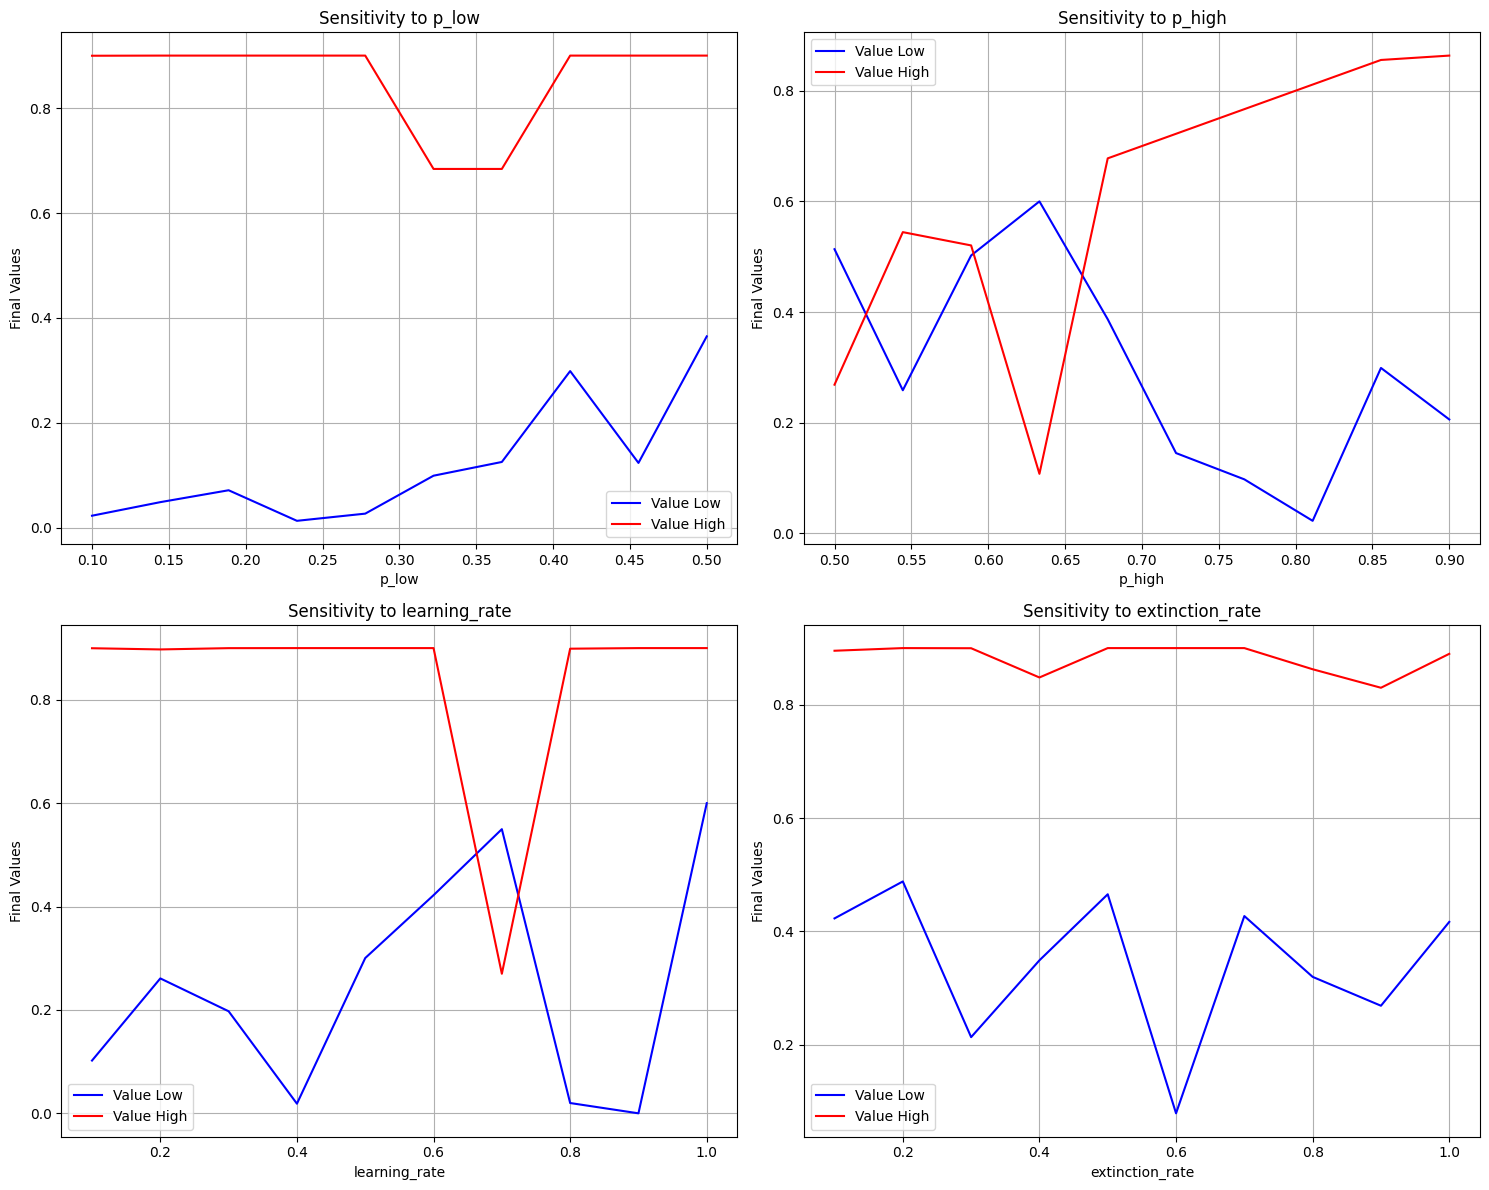

In [1]:
import numpy as np
import pandas as pd
from main import LearningModel
import matplotlib.pyplot as plt
from tqdm import tqdm

def run_sensitivity_analysis(parameter_name, parameter_values, fixed_params, steps=100):
    results = []
    
    for value in tqdm(parameter_values, desc=f'Testing {parameter_name}'):
        # Create params dict with current test value
        params = fixed_params.copy()
        if parameter_name == 'p_low':
            model = LearningModel(N=100, width=100, height=100, learning_model='RWE')
            model.agents[0].p_low = value
        elif parameter_name == 'p_high':
            model = LearningModel(N=100, width=100, height=100, learning_model='RWE')
            model.agents[0].p_high = value
        elif parameter_name == 'learning_rate':
            model = LearningModel(N=100, width=100, height=100, learning_model='RWE')
            model.agents[0].learning_rate = value
        elif parameter_name == 'extinction_rate':
            model = LearningModel(N=100, width=100, height=100, learning_model='RWE')
            model.agents[0].extinction_rate = value
        
        # Run model
        for _ in range(steps):
            model.step()
        
        # Collect final values
        agent = model.agents[0]
        results.append({
            'parameter_value': value,
            'value_low': agent.value_low,
            'value_high': agent.value_high
        })
    
    return pd.DataFrame(results)

# Define parameter ranges to test
param_ranges = {
    'p_low': np.linspace(0.1, 0.5, 10),
    'p_high': np.linspace(0.5, 0.9, 10),
    'learning_rate': np.linspace(0.1, 1.0, 10),
    'extinction_rate': np.linspace(0.1, 1.0, 10)
}

# Fixed parameters
fixed_params = {
    'p_low': 0.6,
    'p_high': 0.9,
    'learning_rate': 0.4,
    'extinction_rate': 1.0
}

# Run analysis for each parameter
results = {}
for param_name, param_range in param_ranges.items():
    results[param_name] = run_sensitivity_analysis(param_name, param_range, fixed_params)

# Plot results
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for idx, (param_name, df) in enumerate(results.items()):
    ax = axes[idx]
    ax.plot(df['parameter_value'], df['value_low'], label='Value Low', color='blue')
    ax.plot(df['parameter_value'], df['value_high'], label='Value High', color='red')
    ax.set_xlabel(param_name)
    ax.set_ylabel('Final Values')
    ax.set_title(f'Sensitivity to {param_name}')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

Testing p_low:   0%|          | 0/10 [00:00<?, ?it/s]

Testing extinction_rate: 100%|██████████| 10/10 [05:32<00:00, 33.24s/it]


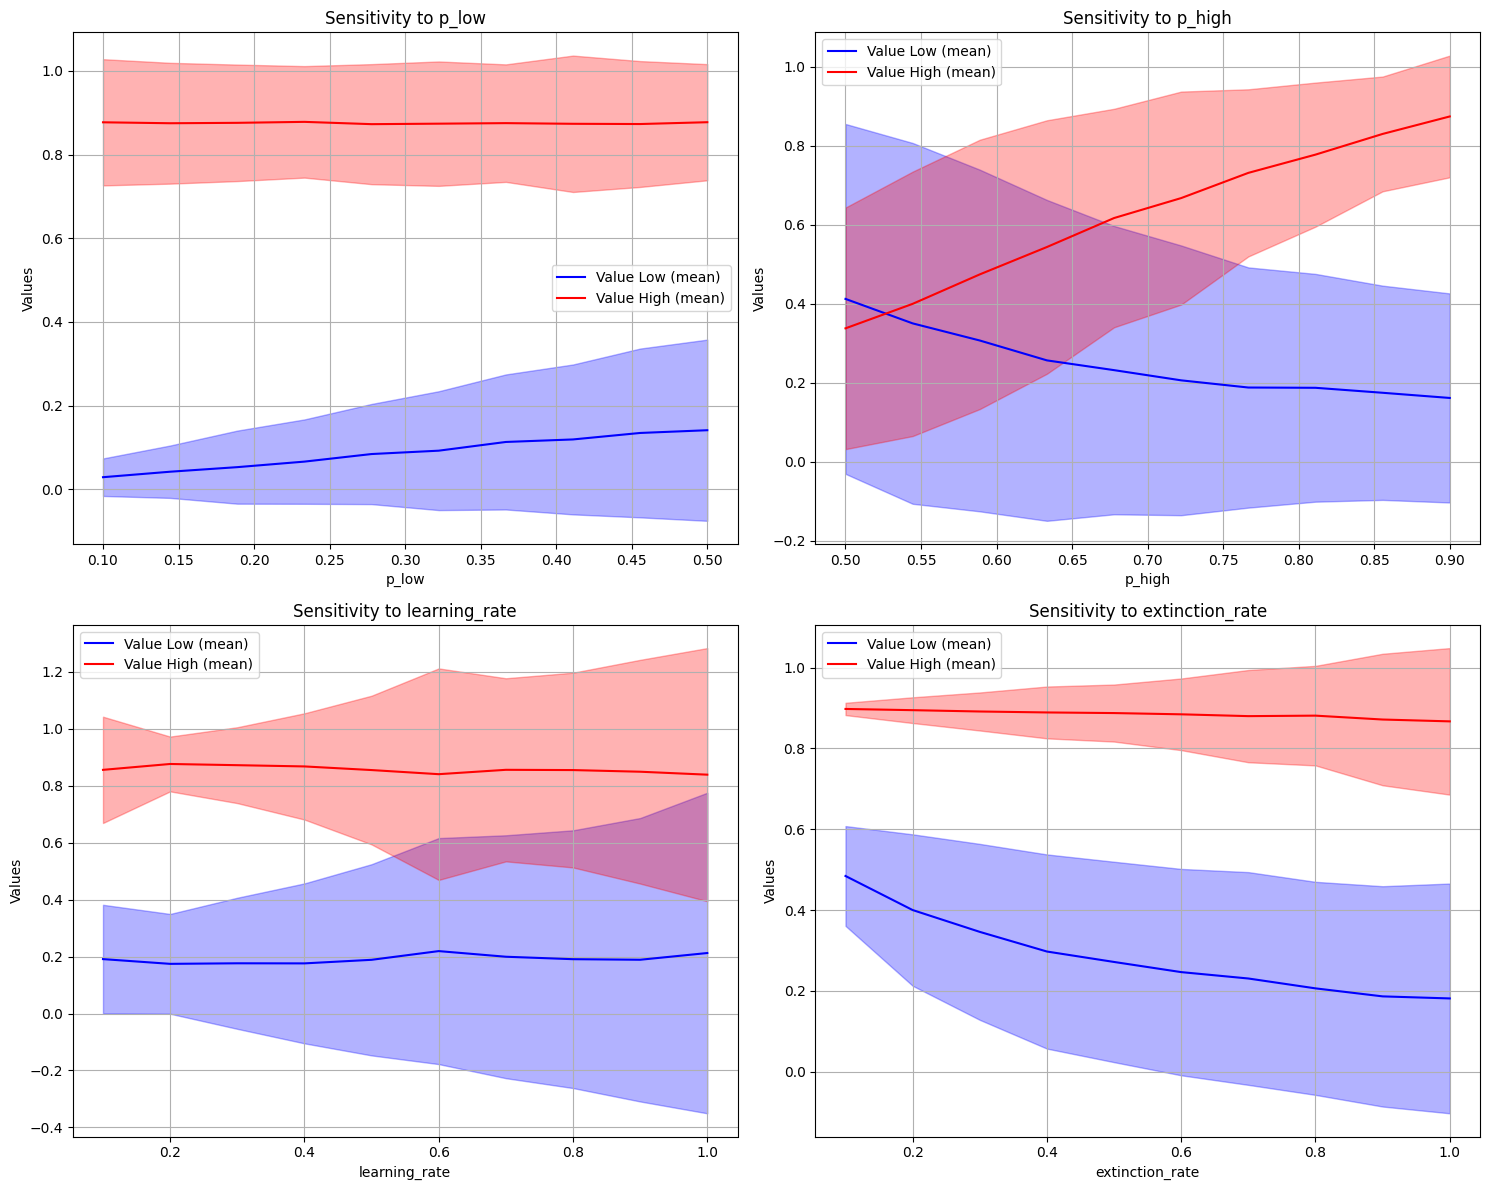


Sensitivity Indices:
                 value_low_sensitivity  value_high_sensitivity
p_low                         0.280841                0.013701
p_high                        0.627389                1.342098
learning_rate                 0.049766                0.041720
extinction_rate               0.336759                0.034157


In [4]:
import numpy as np
import pandas as pd
from main import LearningModel
from main import LearningAgent
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns

def run_sensitivity_analysis(parameter_name, parameter_values, fixed_params, steps=100, n_runs=5):
    results = []
    
    for value in tqdm(parameter_values, desc=f'Testing {parameter_name}'):
        # Run multiple iterations for each parameter value
        for run in range(n_runs):
            if parameter_name == 'p_low':
                model = LearningModel(N=100, width=100, height=100, learning_model='RWE')
                for agent in model.agents:
                    if isinstance(agent, LearningAgent):
                        agent.p_low = value
            elif parameter_name == 'p_high':
                model = LearningModel(N=100, width=100, height=100, learning_model='RWE')
                for agent in model.agents:
                    if isinstance(agent, LearningAgent):
                        agent.p_high = value
            elif parameter_name == 'learning_rate':
                model = LearningModel(N=100, width=100, height=100, learning_model='RWE')
                for agent in model.agents:
                    if isinstance(agent, LearningAgent):
                        agent.learning_rate = value
            elif parameter_name == 'extinction_rate':
                model = LearningModel(N=100, width=100, height=100, learning_model='RWE')
                for agent in model.agents:
                    if isinstance(agent, LearningAgent):
                        agent.extinction_rate = value
            
            # Run model
            for _ in range(steps):
                model.step()
            
            # Collect final values for learning agents only
            for agent in model.agents:
                if isinstance(agent, LearningAgent):
                    results.append({
                        'parameter_value': value,
                        'value_low': agent.value_low,
                        'value_high': agent.value_high,
                        'run': run
                    })
    
    return pd.DataFrame(results)

def plot_sensitivity_results(results, param_ranges):
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    axes = axes.ravel()

    for idx, (param_name, param_range) in enumerate(param_ranges.items()):
        ax = axes[idx]
        df = results[param_name]
        
        # Calculate statistics for each parameter value
        stats = df.groupby('parameter_value').agg({
            'value_low': ['mean', 'std'],
            'value_high': ['mean', 'std']
        }).reset_index()
        
        # Plot mean values with confidence intervals
        ax.fill_between(stats['parameter_value'], 
                       stats['value_low']['mean'] - 1.96 * stats['value_low']['std'],
                       stats['value_low']['mean'] + 1.96 * stats['value_low']['std'],
                       alpha=0.3, color='blue')
        ax.fill_between(stats['parameter_value'],
                       stats['value_high']['mean'] - 1.96 * stats['value_high']['std'],
                       stats['value_high']['mean'] + 1.96 * stats['value_high']['std'],
                       alpha=0.3, color='red')
        
        ax.plot(stats['parameter_value'], stats['value_low']['mean'], 
                label='Value Low (mean)', color='blue')
        ax.plot(stats['parameter_value'], stats['value_high']['mean'],
                label='Value High (mean)', color='red')
        
        ax.set_xlabel(param_name)
        ax.set_ylabel('Values')
        ax.set_title(f'Sensitivity to {param_name}')
        ax.legend()
        ax.grid(True)

    plt.tight_layout()
    return fig

# Define parameter ranges to test
param_ranges = {
    'p_low': np.linspace(0.1, 0.5, 10),
    'p_high': np.linspace(0.5, 0.9, 10),
    'learning_rate': np.linspace(0.1, 1.0, 10),
    'extinction_rate': np.linspace(0.1, 1.0, 10)
}

# Fixed parameters
fixed_params = {
    'p_low': 0.6,
    'p_high': 0.9,
    'learning_rate': 0.4,
    'extinction_rate': 1.0
}

# Run analysis for each parameter
results = {}
for param_name, param_range in param_ranges.items():
    results[param_name] = run_sensitivity_analysis(param_name, param_range, fixed_params)
    
    # Save intermediate results
    results[param_name].to_csv(f'sensitivity_{param_name}.csv', index=False)

# Create visualization
fig = plot_sensitivity_results(results, param_ranges)
plt.show()

# Calculate sensitivity indices
def calculate_sensitivity_indices(results, param_ranges):
    sensitivity_indices = {}
    
    for param_name, df in results.items():
        # Calculate mean values for each parameter value
        means = df.groupby('parameter_value').agg({
            'value_low': 'mean',
            'value_high': 'mean'
        })
        
        # Calculate sensitivity index (normalized range of output variation)
        param_range = param_ranges[param_name][-1] - param_ranges[param_name][0]
        
        sensitivity_low = (means['value_low'].max() - means['value_low'].min()) / param_range
        sensitivity_high = (means['value_high'].max() - means['value_high'].min()) / param_range
        
        sensitivity_indices[param_name] = {
            'value_low_sensitivity': sensitivity_low,
            'value_high_sensitivity': sensitivity_high
        }
    
    return pd.DataFrame(sensitivity_indices).T

# Calculate and display sensitivity indices
sensitivity_indices = calculate_sensitivity_indices(results, param_ranges)
print("\nSensitivity Indices:")
print(sensitivity_indices)